In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

dataset.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [2]:
obj = (dataset.dtypes == "object")
object_cols = list(obj[obj].index)
print(f"Categorical Variables: {object_cols}\nNumber: {len(object_cols)}\n")

ints = (dataset.dtypes == "int")
int_cols = list(ints[ints].index)
print(f"Integer Variables: {int_cols}\nNumber: {len(int_cols)}\n")

float = (dataset.dtypes == "float")
float_cols = list(float[float].index)
print(f"Float Variables: {float_cols}\nNumber: {len(float_cols)}\n")

Categorical Variables: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number: 4

Integer Variables: ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
Number: 6

Float Variables: ['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
Number: 3



<Axes: >

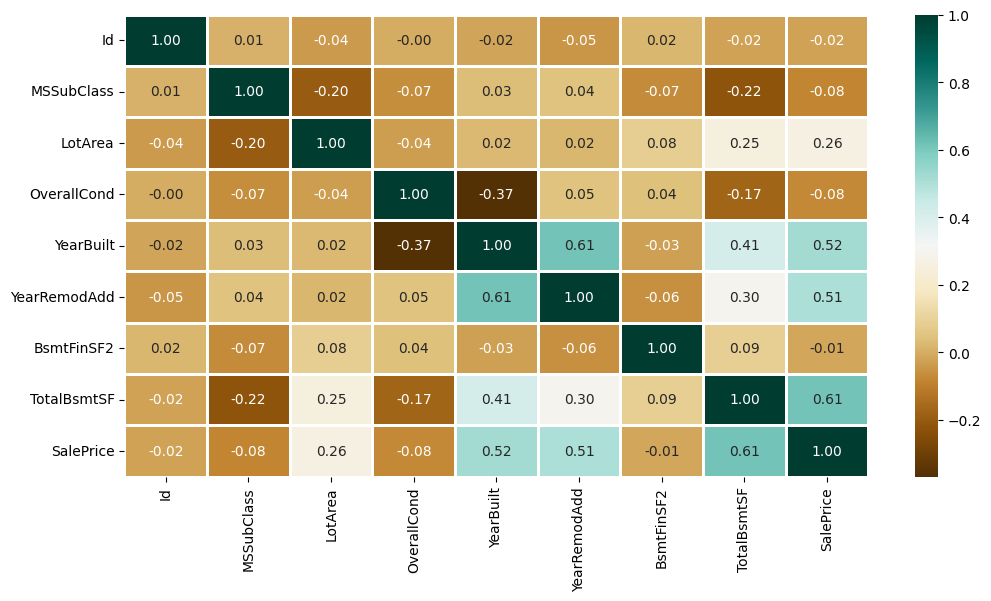

In [3]:
plt.figure(figsize = (12,6))
corrs = dataset[int_cols + float_cols].corr()
sns.heatmap(corrs,
            cmap = "BrBG",
            fmt=".2f",
            linewidths=2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

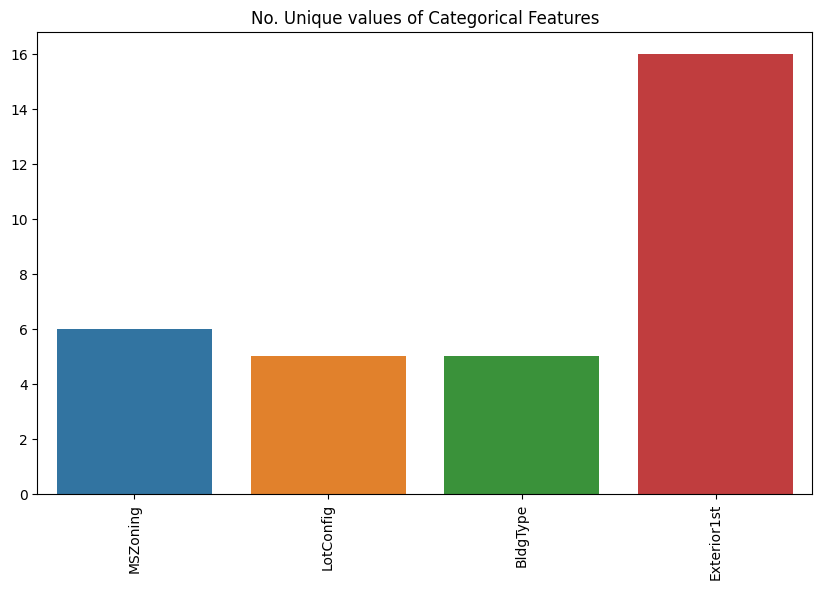

In [4]:
unique_values = []
for col in object_cols:
    uni = dataset[col]
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation = 90)
sns.barplot(x=object_cols,y=unique_values)

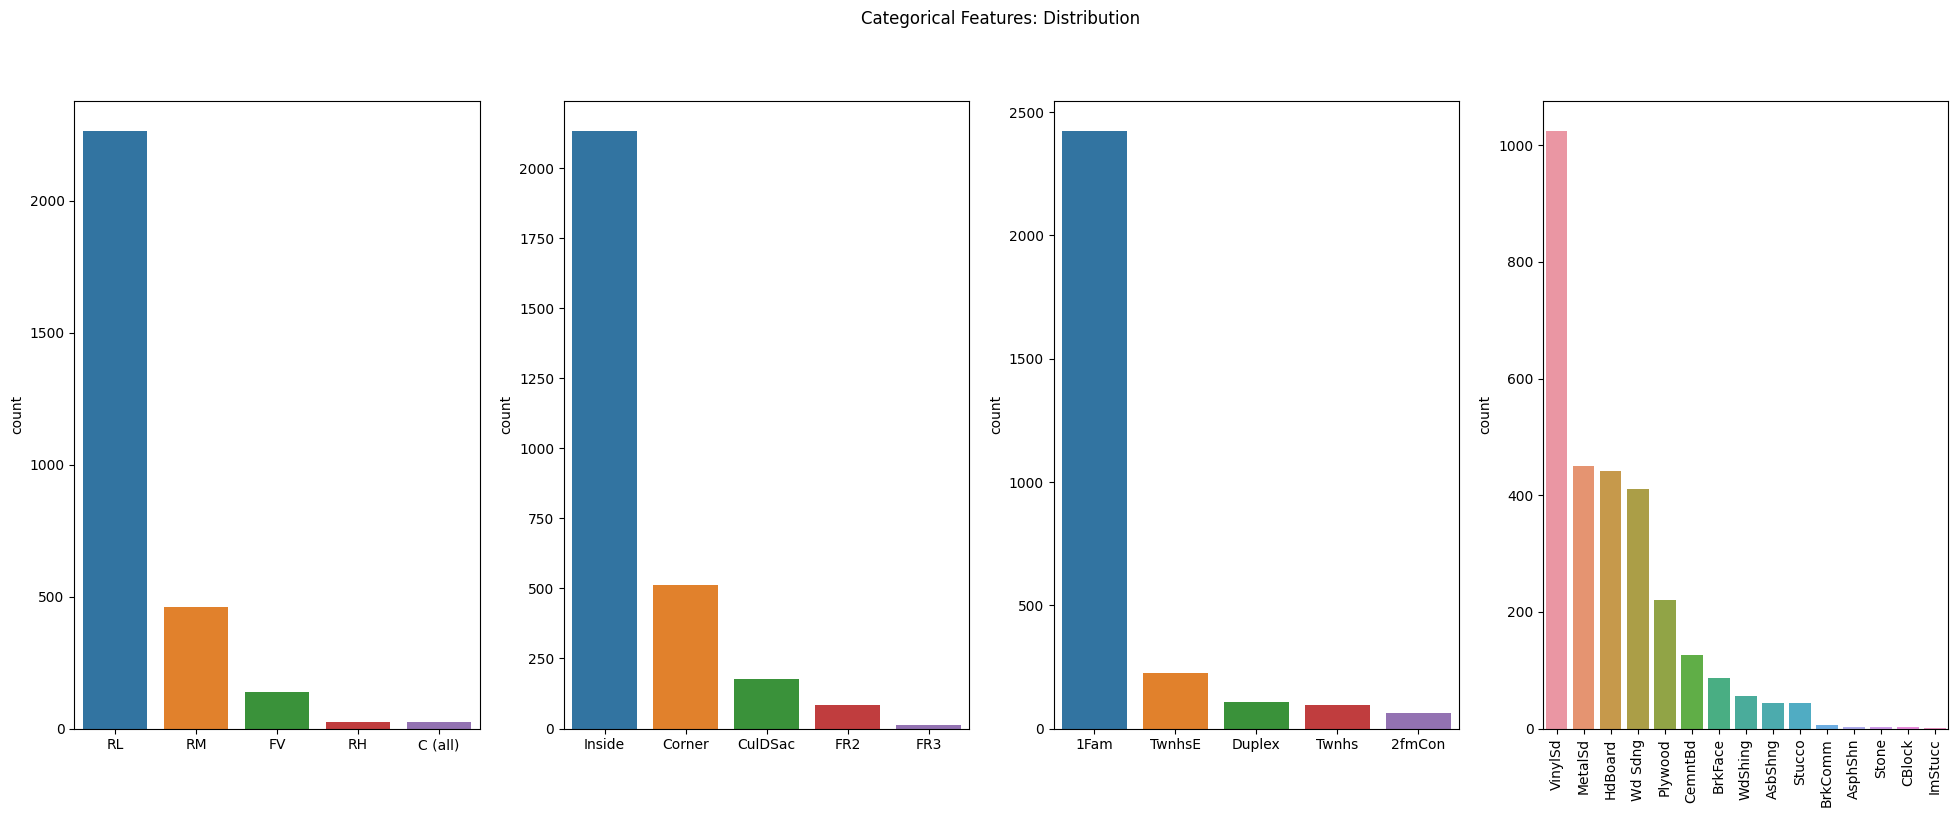

In [5]:
fig, axs = plt.subplots(1,len(object_cols), figsize=(20,8))
fig.suptitle("Categorical Features: Distribution")
fig.tight_layout(pad = 3)
plt.xticks(rotation = 90)


index = 1

for i,col in enumerate(object_cols):
    y = dataset[col].value_counts()
    sns.barplot(ax = axs[i], x = list(y.index), y=y)
    index += 1

In [6]:
dataset.drop(["Id"], axis = 1, inplace = True, errors="ignore")


In [7]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [8]:
new_dataset = dataset.dropna()

In [9]:
new_dataset.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis = 1)

In [11]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [13]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [14]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19043633733511287

In [15]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599943


In [16]:
# This code is contributed by @amartajisce
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
cb_model = CatBoostRegressor()
cb_model.fit(X_train,Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score


Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 70.8ms	remaining: 1m 10s
1:	learn: 55780.1567575	total: 72.9ms	remaining: 36.4s
2:	learn: 55060.9599505	total: 75ms	remaining: 24.9s
3:	learn: 54456.1126921	total: 80.1ms	remaining: 19.9s
4:	learn: 53901.1464265	total: 81.1ms	remaining: 16.1s
5:	learn: 53334.6062357	total: 82.1ms	remaining: 13.6s
6:	learn: 52824.4943646	total: 83ms	remaining: 11.8s
7:	learn: 52381.4267520	total: 84ms	remaining: 10.4s
8:	learn: 51841.0364316	total: 85ms	remaining: 9.35s
9:	learn: 51281.5852560	total: 86ms	remaining: 8.51s
10:	learn: 50825.3817438	total: 87.1ms	remaining: 7.83s
11:	learn: 50477.2609796	total: 88ms	remaining: 7.25s
12:	learn: 50081.4097641	total: 88.8ms	remaining: 6.74s
13:	learn: 49663.6380360	total: 89.5ms	remaining: 6.3s
14:	learn: 49334.5782662	total: 90.2ms	remaining: 5.92s
15:	learn: 48967.5221026	total: 91ms	remaining: 5.6s
16:	learn: 48676.4063222	total: 91.6ms	remaining: 5.3s
17:	learn: 48359.1169955	total: 92.4ms	remai

0.38351169878113034